In [51]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from MyModels import DenseModel
import ipywidgets as widgets
from ipywidgets import interact, Layout
from Training import training
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from utils import generate_model2_data, split_data, plot_data

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Running on: {device}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running on: cuda


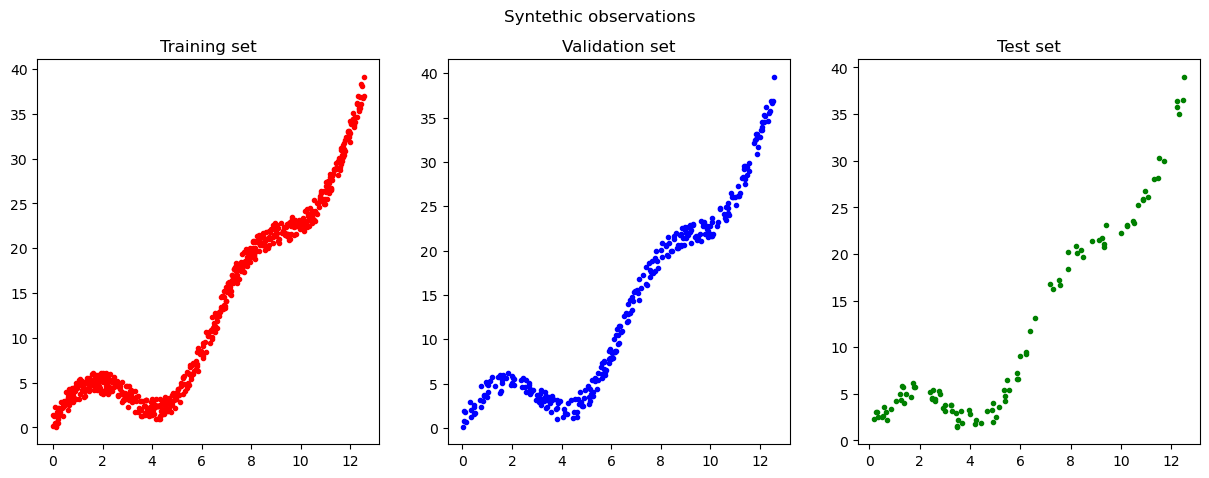

In [52]:
x, y = generate_model2_data()
x_train, y_train, x_validation, y_validation, x_test, y_test = split_data(x, y, train_percentage=0.6, validation_percentage=0.3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle("Syntethic observations")
axs[0].plot(x_train, y_train, 'r.')
axs[0].set_title('Training set')
axs[1].plot(x_validation, y_validation, 'b.')
axs[1].set_title('Validation set')
axs[2].plot(x_test, y_test, 'g.')
axs[2].set_title('Test set')
plt.show()

DenseModel: hidden_layers:10, neurons_per_layer:40, activation_hidden:relu, activation_output:linear
Total number of parameters:  17321
Done!
Last loss: 0.56


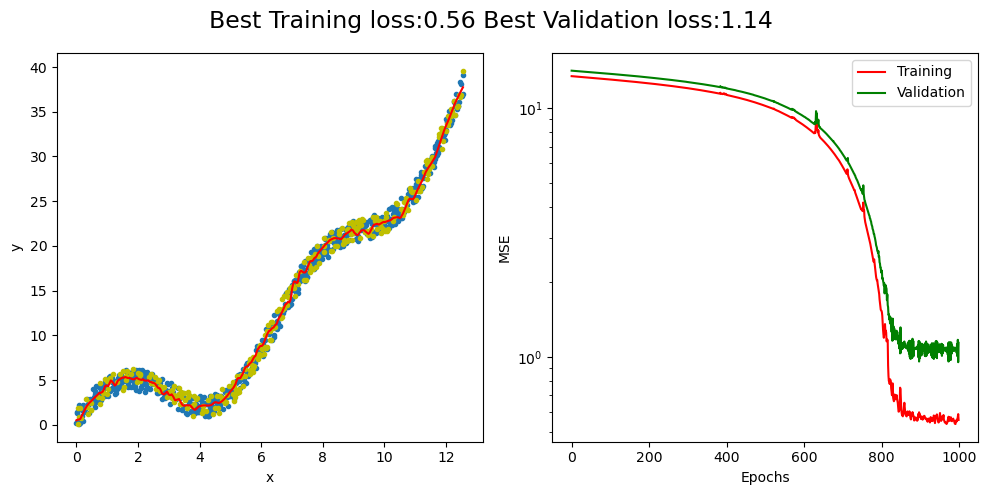

In [61]:
batch_norm = True 
hidden_layers = 10 
neurons_per_layer = 40
model = DenseModel(hidden_layers, neurons_per_layer, 'relu', 'linear').to(device)
print("Total number of parameters: ", sum(p.numel() for p in model.parameters() if p.requires_grad))

epochs = 1000

loss_history, loss_history_val, trained_model = training(loss=nn.L1Loss(),
                                                         optimizer=torch.optim.SGD(model.parameters(), lr=0.003), model=model, 
                                                         epochs=epochs, x=x_train, y=y_train, x_val=x_validation, y_val=y_validation, device=device)

title = f"Best Training loss:{np.min(loss_history[-1]):0.2f} Best Validation loss:{np.min(loss_history_val[-1]):0.2f} "

print(f"Done!")
print(f"Last loss: {loss_history[-1]:0.2f}")
_, idxs = x_train.sort()
_, idxs_val = x_validation.sort()
plot_data(x_train[idxs], y_train[idxs], x_validation[idxs_val], y_validation[idxs_val], trained_model, loss_history, loss_history_val, title = title)